<a href="https://colab.research.google.com/github/SamyFanambinantsoa/Machine_Learning_M2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement des données du dataset et Nettoyage  / prétraitement

In [28]:
import kagglehub
import pandas as pd

# Chargement des données du dataset
path = kagglehub.dataset_download("saurabh00007/diabetescsv")
dataset = pd.read_csv(path + "/diabetes.csv")

# Gérez les zéros/missing dans les variables cliniques en mettant la moyenne globale de la colonne
quant_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dataset_clinique = dataset[quant_cols]
for col in dataset_clinique.columns:
    if dataset_clinique[col].dtype in [int, float]:
        mean_val = dataset[col][dataset[col] != 0].mean()
        mean_val = round(mean_val, 0)
        dataset[col] = dataset[col].replace(0, mean_val)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Affichage des Statistiques descriptives de chaque classe

In [29]:
from IPython.display import display, Markdown

dataset_variable = dataset.drop('Outcome', axis = 1)

stats = pd.DataFrame({
    "Moyenne": dataset_variable.mean(),
    "Écart-type": dataset_variable.std(),
    "Minimum": dataset_variable.min(),
    "Maximum": dataset_variable.max()
})

display(stats.style.set_caption("Statistiques descriptives")
               .format(precision=2)
               .set_table_styles(
                   [{'selector': 'th', 'props': [('border', '1px solid black')]},
                    {'selector': 'td', 'props': [('border', '1px solid gray')]}]
               )
)

,Moyenne,Écart-type,Minimum,Maximum
Pregnancies,3.85,3.37,0.00,17.00
Glucose,121.69,30.44,44.00,199.00
BloodPressure,72.39,12.10,24.00,122.00
SkinThickness,29.11,8.79,7.00,99.00
Insulin,155.77,85.02,14.00,846.00
BMI,32.45,6.88,18.20,67.10
DiabetesPedigreeFunction,0.47,0.33,0.08,2.42
Age,33.24,11.76,21.00,81.00


# Affichage des Barplots et statistiques descriptives par classe

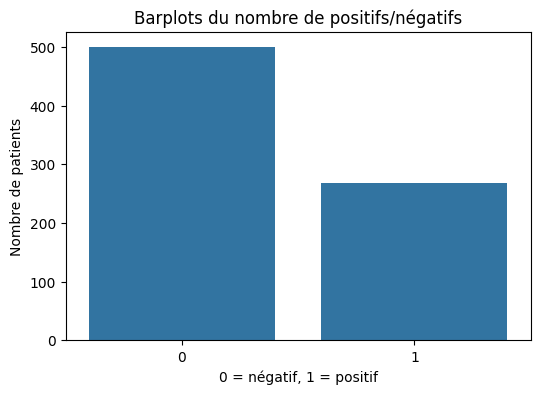

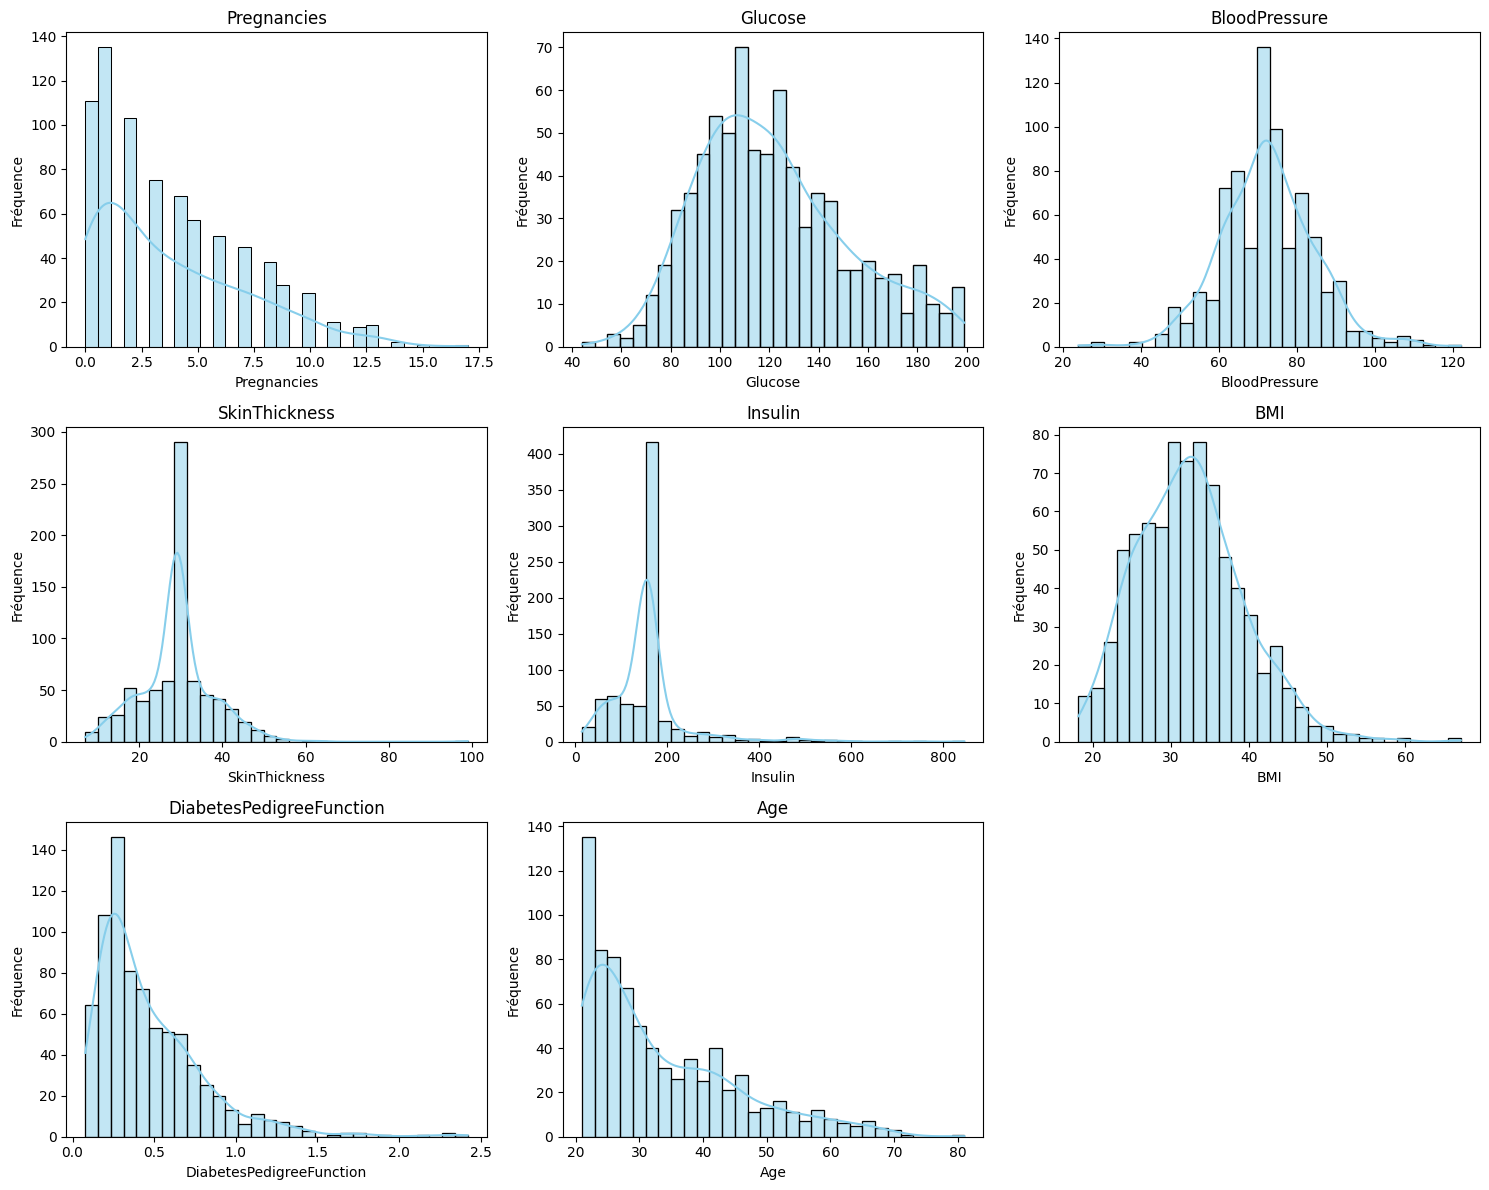

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=dataset)
plt.title('Barplots du nombre de positifs/négatifs')
plt.xlabel('0 = négatif, 1 = positif')
plt.ylabel('Nombre de patients')
plt.show()

plt.figure(figsize=(15, 12))
for i, column in enumerate(dataset_variable.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset_variable[column], bins=30, kde=True, color='skyblue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.tight_layout()

# Standardisation des données et Spliting des données *train/validation/test*






In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dataset_variable
quant_cols = ["Outcome"]
dataset_target = dataset[quant_cols]
Y = dataset_target

#Split des datas (60 train, 20 validation, 20 test)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=3)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)


# A quoi sert de gérer le désequilibre ?

On parle de déséquilibre lorsqu’il y a une distribution inégale des classes dans un ensemble de données, avec une classe dominante et une ou plusieurs classes minoritaires. Dans notre cas, on peut constater que le nombre de négatif est nettement supérieur au nombre de positif.

De ce fait, sans gestion de ce désequilibre, les modèles ont tendance à développer des biais et favoriser la prédiction de ces classes au détriment des minoritaires.

In [32]:
équilibre = "balanced"

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Entraînement
model = LogisticRegression(class_weight=équilibre, random_state=3)
model.fit(X_train, y_train.values.ravel())

# Prédictions
y_pred = model.predict(X_test)

# Rapport classification

accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

print(f". Evaluation Accuracy, Precision, Recall, F1 sur validation.")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
print(f"F1-score : {f1:.3f}")


. Evaluation Accuracy, Precision, Recall, F1 sur validation.
Accuracy : 0.558
Precision : 0.471
Recall : 0.500
F1-score : 0.485


# Matrice de confusion, analyses sur le test set




. Evaluation Accuracy, Precision, Recall, F1 sur le test set.
Accuracy_test_set : 0.760
Precision_test_set : 0.676
Recall_test_set : 0.754
F1-score_test_set : 0.713 



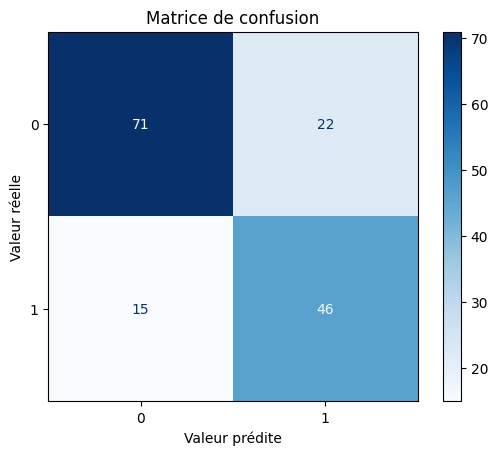

Pregnancies                 0.477277
Glucose                     1.128009
BloodPressure              -0.037145
SkinThickness              -0.014580
Insulin                     0.008169
BMI                         0.747210
DiabetesPedigreeFunction    0.455858
Age                         0.136096
dtype: float64


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion, analyses sur le test set
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f". Evaluation Accuracy, Precision, Recall, F1 sur le test set.")
print(f"Accuracy_test_set : {accuracy:.3f}")
print(f"Precision_test_set : {precision:.3f}")
print(f"Recall_test_set : {recall:.3f}")
print(f"F1-score_test_set : {f1:.3f} \n")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Valeur prédite")
plt.ylabel("Valeur réelle")
plt.show()

# Analyse de l'importance des features
coefficients = pd.Series(model.coef_[0], index=X.columns)
print(coefficients)

# Importance des features

Glucose, Pregnancy, BMI, DiabetesPedigreeFunction représentent des features qui influencent en majeur partie de la prédiction. Age, Insulin sont peu signifiants et BloodPressure et Skinthickness diminuent la probabilité

# Qu’est-ce que la matrice de confusion ?

La matrice de confusion est un outil utilisé pour évaluer la performance d'un modèle et est représentée visuellement sous la forme d'un tableau. Il permet aux praticiens des données de mieux comprendre les performances, les erreurs et les faiblesses du modèle. Cela permet aux praticiens des données d'analyser plus en détail leur modèle en l'affinant.

# Structure de la matrice de confusion ?

![An image](https://media.datacamp.com/legacy/v1701364260/image_5baaeac4c0.png)

1.   TP (True Positive) : Vrai positif (bien prédit positif)

2.   TN (True Negative) : Vrai négatif (bien prédit négatif)

3.   FP (False Positive) : Faux positif (faux "positif")

4.   FN (False Negative) : Faux négatif (faux "négatif")

# Analyse de la matrice et performance

Sur 154 individus, nous avons pu constater 71 vrais positifs et 46 vrais négatifs, ce qui représente un *'accuracy'* de 76 %.









